In [2]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
encode = LabelEncoder()
df['species'] = encode.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df = df[['sepal_length', 'petal_length', 'species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [8]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [16]:
clf = LogisticRegression(multi_class = 'multinomial')

In [17]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [18]:
accuracy_score(y_test,y_pred)

0.9666666666666667

<AxesSubplot:>

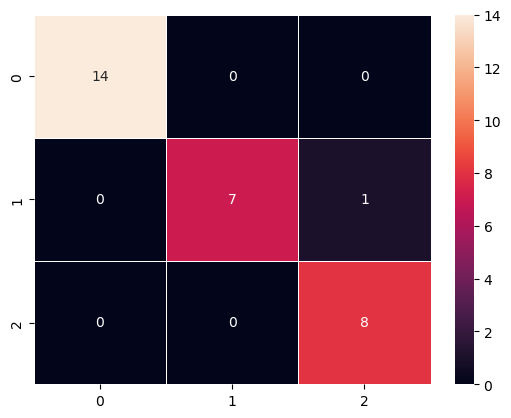

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, linewidth=.5)

In [25]:
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

C:\Users\mahak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [26]:
clf.predict(query)

C:\Users\mahak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

C:\Users\mahak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


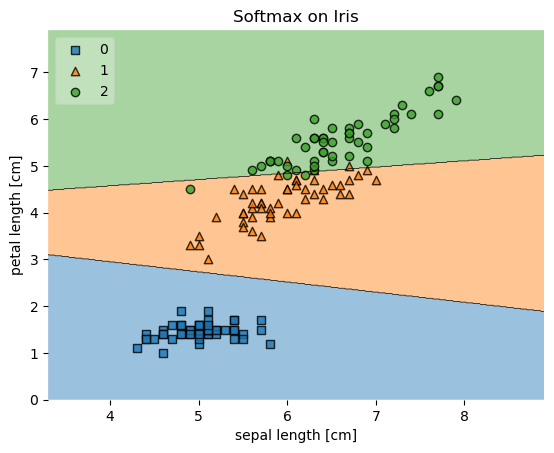

In [28]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend = 2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()